In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
print("/content/Mall_Customers.csv")
df = pd.read_csv("/content/Mall_Customers.csv")

/content/Mall_Customers.csv


In [6]:
df = pd.read_csv("/content/Mall_Customers.csv")
print("\n✅ Dataset Loaded Successfully!\n")


✅ Dataset Loaded Successfully!



In [7]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

Dataset Shape: (200, 5)

First 5 Rows:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
print("\nStatistical Summary:\n")
print(df.describe())


Statistical Summary:

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


/tmp/ipython-input-3279348921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, palette="pastel")


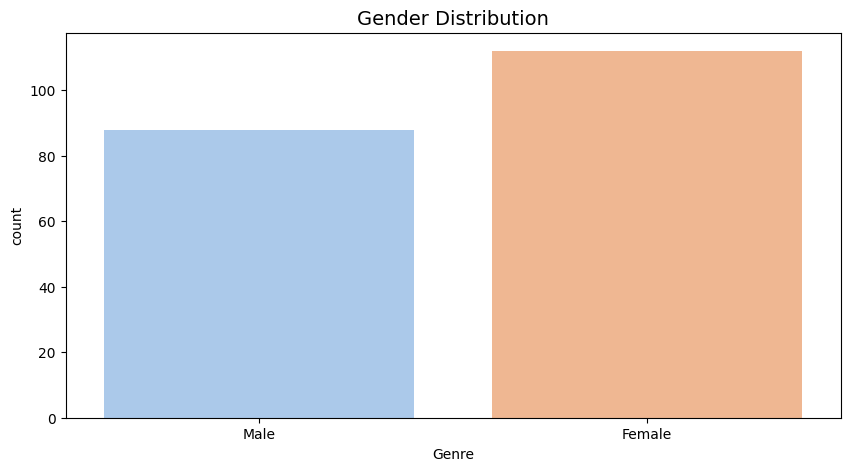

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x="Genre", data=df, palette="pastel")
plt.title("Gender Distribution", fontsize=14)
plt.show()

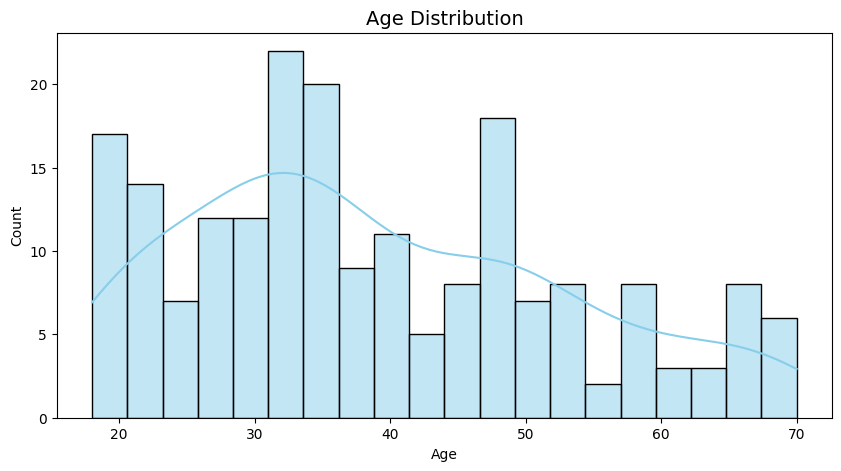

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution", fontsize=14)
plt.show()

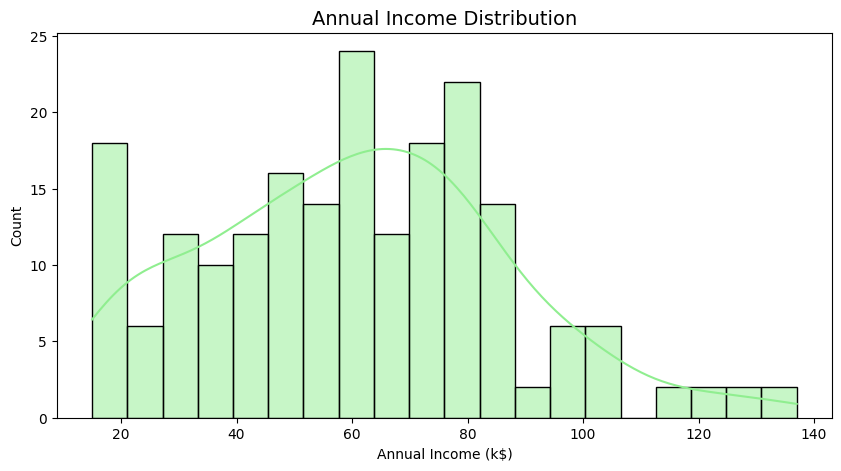

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="lightgreen")
plt.title("Annual Income Distribution", fontsize=14)
plt.show()

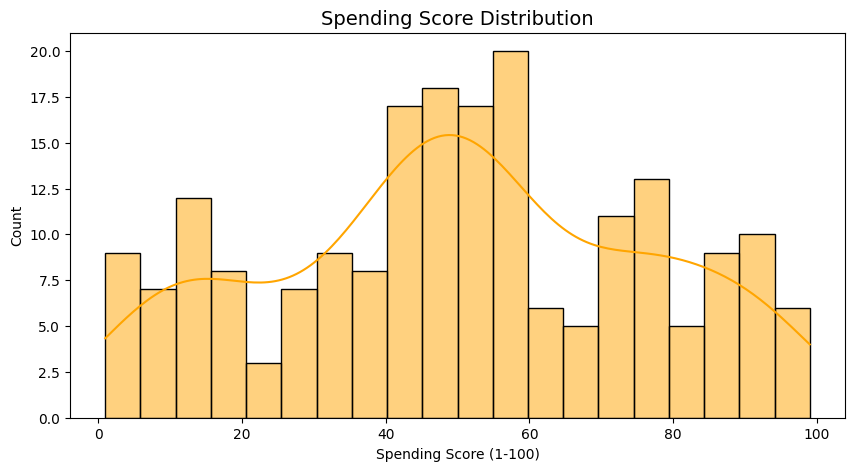

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="orange")
plt.title("Spending Score Distribution", fontsize=14)
plt.show()

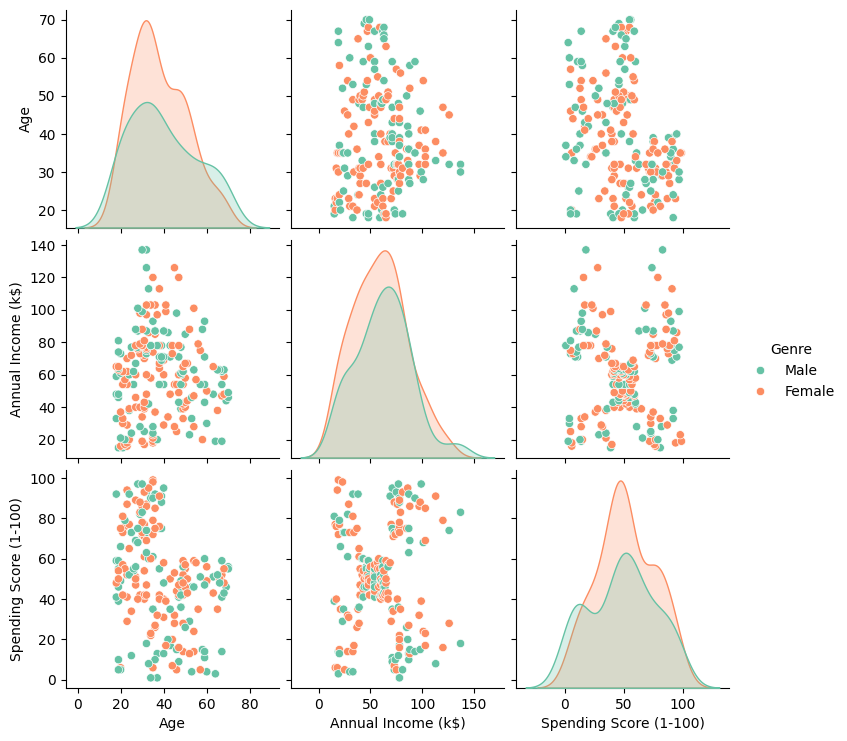

In [16]:
sns.pairplot(df.drop("CustomerID", axis=1), hue="Genre", palette="Set2")
plt.show()

In [17]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

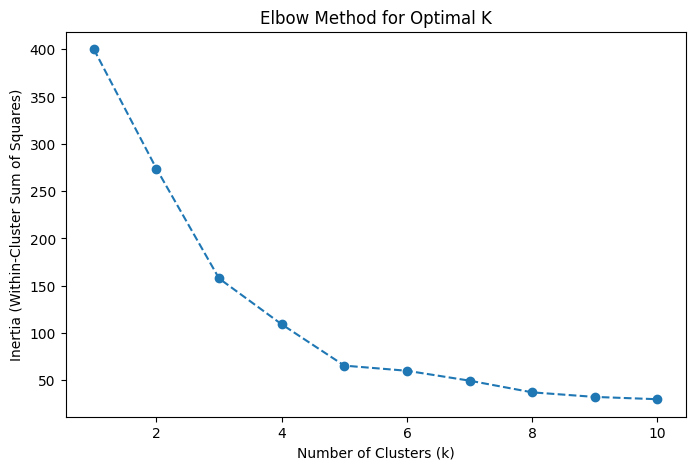

In [20]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [21]:
optimal_k = 5  # From elbow method
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [22]:
print("\nCluster Assigned to Each Customer:\n", df.head())


Cluster Assigned to Each Customer:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [23]:
plt.figure(figsize=(10,6))
colors = ["red", "blue", "green", "purple", "orange"]


<Figure size 1000x600 with 0 Axes>

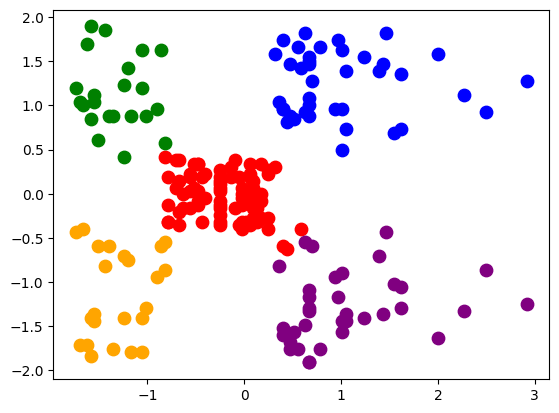

In [24]:
for i in range(optimal_k):
    plt.scatter(
        X_scaled[df["Cluster"] == i, 0],
        X_scaled[df["Cluster"] == i, 1],
        s=80, c=colors[i], label=f"Cluster {i}"
    )

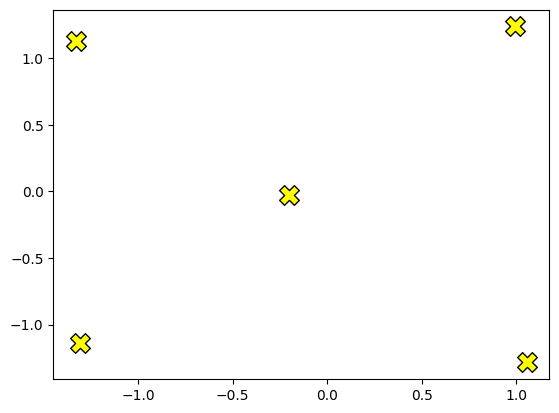

In [25]:
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s=200, c="yellow", marker="X", edgecolor="black", label="Centroids"
)


/tmp/ipython-input-2389856527.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


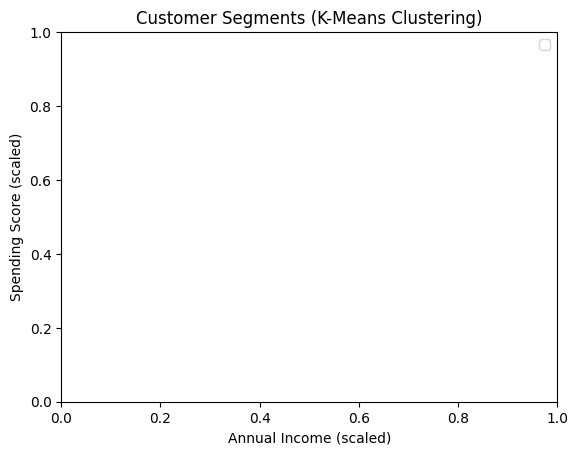

In [26]:
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.show()

In [27]:
print("\nCluster Summary:\n")
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)", "Age"]].mean()
print(cluster_summary)



Cluster Summary:

         Annual Income (k$)  Spending Score (1-100)        Age
Cluster                                                       
0                 55.296296               49.518519  42.716049
1                 86.538462               82.128205  32.692308
2                 25.727273               79.363636  25.272727
3                 88.200000               17.114286  41.114286
4                 26.304348               20.913043  45.217391


In [28]:
print("\n✅ Customers are grouped into different segments based on their income and spending score.\n")


✅ Customers are grouped into different segments based on their income and spending score.

